# Лабораторна №9. Тензори. Нейронні мережі та табличні дані.
## Робота з тензорами.

### Імпортуйте необхідні біліотеки.

In [54]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [55]:
np.random.seed(42) # запустіть цю клітинку, щоб ваші результати співпадали з тим, що наведено у прикладі.
torch.manual_seed(42)

### Створіть numpy масив який містить 12 випадкових цілих чисел в межах від 0 (включно) до 12 (невключно).

In [56]:
# пишіть код тут.
arr = np.random.randint(0, 12, size=12, dtype=np.int32)
print(arr)

[ 6  3 10  7  4  6  9  2  6 10 10  7]


[ 6  3 10  7  4  6  9  2  6 10 10  7]


### Створіть тензор з масиву, створеного вище.

In [57]:
# пишіть код тут.
x = torch.from_numpy(arr)
print(x)
print(x.dtype)

tensor([ 6,  3, 10,  7,  4,  6,  9,  2,  6, 10, 10,  7], dtype=torch.int32)
torch.int32


tensor([ 6,  3, 10,  7,  4,  6,  9,  2,  6, 10, 10,  7], dtype=torch.int32)


### Змініть тип тензора на int64.

In [58]:
# пишіть код тут.
x = x.type(torch.float64)
print(x.dtype)

torch.float64


In [8]:
x = x.long()
print(x.type())

torch.LongTensor


### Змініть розміри тензора на 3x4.

In [59]:
# пишіть код тут.
X = x.reshape(3, 4)
X

tensor([[ 6.,  3., 10.,  7.],
        [ 4.,  6.,  9.,  2.],
        [ 6., 10., 10.,  7.]], dtype=torch.float64)

tensor([[ 6,  3, 10,  7],
        [ 4,  6,  9,  2],
        [ 6, 10, 10,  7]])


### Виведіть значення 4 стовпчика.

In [ ]:
# пишіть код тут.
X[:, 3].unsqueeze(1)

tensor([[7.],
        [2.],
        [7.]], dtype=torch.float64)

tensor([[7],
        [2],
        [7]])

### Без зміни тензора, поверніть тензор, у якому є квадрати значеннь з основного тензора.

In [63]:
# пишіть код тут.
X ** 2
 

tensor([[ 36.,   9., 100.,  49.],
        [ 16.,  36.,  81.,   4.],
        [ 36., 100., 100.,  49.]], dtype=torch.float64)

tensor([[ 36,   9, 100,  49],
        [ 16,  36,  81,   4],
        [ 36, 100, 100,  49]])

### Створіть ще одни тензор, з такими ж елементами, як у основному тензорі, але який можна буде перемножити з основним тензором.
Використайте PyTorch для створення тензора.

In [100]:
# пишіть код тут.
X2 = np.random.randint(0, 12, size=(3, 4), dtype=np.int32)
X2 = torch.from_numpy(X2)
X2.reshape(4, 3)

tensor([[ 8, 11,  6],
        [ 8,  7, 11],
        [ 1,  0,  6],
        [ 6,  7,  4]], dtype=torch.int32)

In [101]:
X = X.int()
X

tensor([[ 6,  3, 10],
        [ 7,  4,  6],
        [ 9,  2,  6],
        [10, 10,  7]], dtype=torch.int32)

tensor([[ 6, 11,  4],
        [10,  6, 11],
        [ 4,  8, 10],
        [ 5, 10, 10]])


### Знайдіть добуток двох матриць: основної, та створеної на минулому кроці.

In [102]:
# пишіть код тут.
X @ X2

tensor([[129, 159, 109,  88],
        [120, 157,  88,  80],
        [122, 157,  98,  96],
        [192, 262, 119, 108]], dtype=torch.int32)

tensor([[141, 234, 227],
        [130, 172, 192],
        [211, 276, 304]])


## Нейромережі.
Використайте один з наборів даних, які вже використовувались у попередніх лабораторних роботах. Проведіть аналіз даних, та розділіть їх на незалежні та цільові змінні. Створіть моделі штучної нейронної мережі, які зможуть прогнозувати цільову змінну використовуючи різні фреймворки. Мережі мають містити як мінімум один прихований рівень.

In [76]:
import pandas as pd
import torch
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [77]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target

In [115]:
X_wine[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [79]:
X_wine.shape

(178, 13)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

In [81]:
X_train.mean(axis=0), X_test.mean(axis=0)

(array([1.29790845e+01, 2.37352113e+00, 2.36084507e+00, 1.94732394e+01,
        1.00443662e+02, 2.28908451e+00, 2.00211268e+00, 3.68028169e-01,
        1.60802817e+00, 5.05760563e+00, 9.56380282e-01, 2.59281690e+00,
        7.34894366e+02]),
 array([1.30855556e+01, 2.18972222e+00, 2.38888889e+00, 1.95805556e+01,
        9.69722222e+01, 2.31888889e+00, 2.13638889e+00, 3.37500000e-01,
        1.52333333e+00, 5.05999997e+00, 9.61666667e-01, 2.68611111e+00,
        7.94222222e+02]))

In [82]:
X_train.std(axis=0), X_test.std(axis=0)

(array([8.17222973e-01, 1.13989881e+00, 2.78232583e-01, 3.44260619e+00,
        1.45991147e+01, 6.35465788e-01, 1.00062785e+00, 1.27816106e-01,
        5.81597169e-01, 2.32269541e+00, 2.33275142e-01, 7.19593358e-01,
        3.01257195e+02]),
 array([7.72680919e-01, 9.91885091e-01, 2.53122476e-01, 2.84202778e+00,
        1.23546800e+01, 5.76424698e-01, 9.70395546e-01, 1.04731800e-01,
        5.20309737e-01, 2.26813427e+00, 2.05433147e-01, 6.54973612e-01,
        3.56062035e+02]))

In [83]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [84]:
X_train.mean(axis=0), X_test.mean(axis=0)

(array([ 8.30321727e-15, -5.73387191e-16,  4.72196617e-15,  1.22359087e-16,
        -3.69813726e-16,  1.83343169e-16,  9.90795865e-16, -1.01268759e-15,
         3.63558948e-16,  3.19775505e-16,  1.24626444e-15,  1.76697467e-16,
        -1.56369440e-18]),
 array([ 0.13028396, -0.16124142,  0.10079272,  0.03117293, -0.23778426,
         0.04690163,  0.13419196, -0.23884446, -0.14562457,  0.00103084,
         0.02266159,  0.12964851,  0.19693424]))

In [85]:
X_train.std(axis=0), X_test.std(axis=0)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0.94549584, 0.87015188, 0.90975138, 0.82554542, 0.84626227,
        0.90709006, 0.96978666, 0.81939439, 0.8946222 , 0.97650956,
        0.8806474 , 0.91019964, 1.18192044]))

In [ ]:
class NetModel(nn.Module):
    def __init__(self, input_dim, nclass, layer_size=[32, 64], dropout=0.3):
        super(NetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, layer_size[0])
        self.fc2 = nn.Linear(layer_size[0], layer_size[1])
        self.fc3 = nn.Linear(layer_size[1], nclass)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()

    def forward(self, X):
        X = self.dropout1(self.relu1(self.fc1(X)))
        X = self.dropout2(self.relu2(self.fc2(X)))
        X = self.fc3(X)
        return X

In [126]:
class Dataset(torch.utils.data.Dataset):
    
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X) 
        self.y = torch.LongTensor(y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
    def __len__(self):
        return len(self.y)

In [127]:
batch_size = 32

train_d = Dataset(X_train, y_train)
test_d = Dataset(X_test, y_test)

train_dl = DataLoader(train_d, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_d, batch_size=batch_size, shuffle=False)

n_train=X_train.shape[0]
n_test=X_test.shape[0]

In [128]:
next(iter(train_dl))

[tensor([[-1.4306e+00, -2.2241e-01,  1.3627e+00,  5.8873e-01,  2.2985e+00,
          -1.0844e+00, -1.0115e+00, -1.7840e+00, -8.2580e-02, -1.1011e+00,
          -2.7351e-02, -4.6251e-01, -3.6479e-01],
         [ 9.0663e-01, -8.2772e-01,  5.0014e-01, -8.0556e-01,  5.1759e-01,
           1.7482e+00,  1.6668e+00, -1.3928e+00,  7.4273e-01,  7.5016e-01,
          -2.8456e-01,  3.8519e-01,  1.8260e+00],
         [-1.2470e+00, -1.1260e+00, -2.1868e-01,  4.4349e-01,  3.8108e-02,
           1.7167e+00,  1.3780e-01, -1.8623e+00,  7.2166e-02, -7.9546e-01,
           1.4412e-01,  7.4651e-01,  5.0158e-01],
         [ 1.7142e+00,  1.0672e+00, -2.9057e-01, -1.0089e+00,  1.0660e-01,
           1.5121e+00,  1.1672e+00, -7.6695e-01,  1.0006e+00, -6.7855e-02,
           3.5846e-01,  1.1773e+00,  1.0958e+00],
         [ 3.5598e-01,  1.6725e+00, -3.6245e-01,  1.5301e-01,  1.3396e+00,
          -1.1001e+00, -1.3113e+00,  4.8485e-01, -4.4365e-01,  2.2140e+00,
          -1.5706e+00, -1.4353e+00,  3.3229e-01],


In [129]:
train_d.__len__()

142

In [130]:
X_train.shape

(142, 13)

In [131]:
len(train_dl)

5

In [132]:
model=NetModel(input_dim=13, nclass=3, layer_size=[32,64], dropout=0.1).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [133]:
print(model)

NetModel(
  (fc1): Linear(in_features=13, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (dropout2): Dropout(p=0.1, inplace=False)
  (relu1): ReLU()
  (relu2): ReLU()
)


In [134]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

In [135]:
epochs= 15
    
for epoch in range(epochs):
    model.train()
    
    acc_train = 0
    loss_train = 0

    for X,y in tqdm(train_dl):
        X = X.to(device)
        y = y.to(device)
                
        output = model(X)
                
        loss = criterion(output, y)
        loss_train += loss.item()
                
        acc = (output.argmax(dim=1) == y).sum().item()
        acc_train += acc

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    acc_val = 0
    loss_val = 0
    model.eval()
    with torch.no_grad():
        for X,y in test_dl:
            X = X.to(device)
            y = y.to(device)
            
            output = model(X)
            
            loss = criterion(output, y)
            loss_val += loss.item()
            
            acc = (output.argmax(dim=1) == y).sum().item()
            acc_val += acc
            
    loss_train=loss_train/n_train
    loss_val=loss_val/n_test
    acc_train=acc_train/n_train
    acc_val=acc_val/n_test
    loss_train_list.append(loss_train)
    loss_val_list.append(loss_val)
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)
    print(f'Epochs: {epoch + 1} | Train Loss: {loss_train: .3f} \
| Train Accuracy: {acc_train: .3f} | \
Val Loss: {loss_val: .3f}\
| Val Accuracy: {acc_val: .3f}')

100%|██████████| 5/5 [00:00<00:00, 134.45it/s]


Epochs: 1 | Train Loss:  0.037 | Train Accuracy:  0.472 | Val Loss:  0.052| Val Accuracy:  0.778


100%|██████████| 5/5 [00:00<00:00, 207.76it/s]


Epochs: 2 | Train Loss:  0.029 | Train Accuracy:  0.810 | Val Loss:  0.036| Val Accuracy:  0.944


100%|██████████| 5/5 [00:00<00:00, 183.12it/s]


Epochs: 3 | Train Loss:  0.017 | Train Accuracy:  0.923 | Val Loss:  0.016| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 180.83it/s]


Epochs: 4 | Train Loss:  0.009 | Train Accuracy:  0.951 | Val Loss:  0.005| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 265.89it/s]


Epochs: 5 | Train Loss:  0.005 | Train Accuracy:  0.972 | Val Loss:  0.001| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 147.02it/s]


Epochs: 6 | Train Loss:  0.003 | Train Accuracy:  0.972 | Val Loss:  0.001| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 127.29it/s]


Epochs: 7 | Train Loss:  0.001 | Train Accuracy:  0.986 | Val Loss:  0.000| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 205.41it/s]


Epochs: 8 | Train Loss:  0.001 | Train Accuracy:  0.993 | Val Loss:  0.000| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 304.19it/s]


Epochs: 9 | Train Loss:  0.001 | Train Accuracy:  0.993 | Val Loss:  0.000| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 261.42it/s]


Epochs: 10 | Train Loss:  0.001 | Train Accuracy:  0.986 | Val Loss:  0.000| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 300.12it/s]


Epochs: 11 | Train Loss:  0.001 | Train Accuracy:  0.993 | Val Loss:  0.000| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 298.71it/s]


Epochs: 12 | Train Loss:  0.000 | Train Accuracy:  0.993 | Val Loss:  0.000| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 196.77it/s]


Epochs: 13 | Train Loss:  0.000 | Train Accuracy:  1.000 | Val Loss:  0.000| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 217.66it/s]


Epochs: 14 | Train Loss:  0.000 | Train Accuracy:  1.000 | Val Loss:  0.000| Val Accuracy:  1.000


100%|██████████| 5/5 [00:00<00:00, 200.25it/s]


Epochs: 15 | Train Loss:  0.000 | Train Accuracy:  1.000 | Val Loss:  0.000| Val Accuracy:  1.000


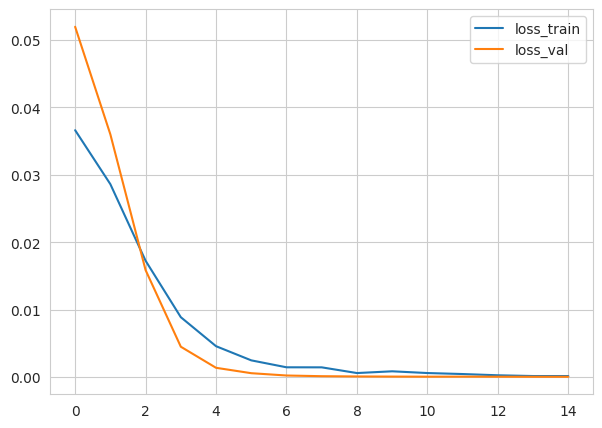

In [136]:
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(loss_train_list)), loss_train_list, label = 'loss_train')
plt.plot(np.arange(len(loss_val_list)), loss_val_list, label = 'loss_val')
plt.legend(loc='upper right')
plt.show()

In [138]:
preds = []
model.eval()
with torch.no_grad():
    for X, y in test_dl:
        X = X.to(device)
        y = y.to(device)
        output = model(X)
        preds.append(output.argmax(dim=1).cpu().numpy())
preds = np.concatenate(preds)
preds[:10]

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2])

In [139]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, target_names=wine_data.target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [245]:
df = pd.read_csv("advertising.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [246]:
df['Clicked on Ad'].unique()

array([0, 1])

In [247]:
X_adv = df.drop(columns=['Clicked on Ad', 'Ad Topic Line', 'City', 'Country', 'Timestamp'])
y_adv = df['Clicked on Ad'].to_numpy()
X_adv = X_adv.to_numpy()

X_adv[:5]

array([[6.895000e+01, 3.500000e+01, 6.183390e+04, 2.560900e+02,
        0.000000e+00],
       [8.023000e+01, 3.100000e+01, 6.844185e+04, 1.937700e+02,
        1.000000e+00],
       [6.947000e+01, 2.600000e+01, 5.978594e+04, 2.365000e+02,
        0.000000e+00],
       [7.415000e+01, 2.900000e+01, 5.480618e+04, 2.458900e+02,
        1.000000e+00],
       [6.837000e+01, 3.500000e+01, 7.388999e+04, 2.255800e+02,
        0.000000e+00]])

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_adv, y_adv, test_size=0.2, random_state=42)

In [249]:
X_train.mean(axis=0), X_test.mean(axis=0)

(array([6.51795125e+01, 3.60487500e+01, 5.50608242e+04, 1.81542325e+02,
        4.77500000e-01]),
 array([6.42829500e+01, 3.58500000e+01, 5.47567036e+04, 1.73831200e+02,
        4.95000000e-01]))

In [250]:
X_train.std(axis=0), X_test.std(axis=0)

(array([1.59063648e+01, 8.82617547e+00, 1.33762187e+04, 4.37969060e+01,
        4.99493493e-01]),
 array([1.55799859e+01, 8.59694713e+00, 1.35312737e+04, 4.36714422e+01,
        4.99974999e-01]))

In [251]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [252]:
X_train.mean(axis=0), X_test.mean(axis=0)

(array([-2.74696932e-15,  1.66880398e-16,  3.57845698e-15,  3.08593429e-15,
         2.43138842e-16]),
 array([-0.05636502, -0.02251825, -0.02273592, -0.17606552,  0.03503549]))

In [253]:
X_train.std(axis=0), X_test.std(axis=0)

(array([1., 1., 1., 1., 1.]),
 array([0.97948124, 0.97402858, 1.01159184, 0.99713533, 1.00096399]))

In [254]:
class NetModel(nn.Module):
    def __init__(self, input_dim, nclass, layer_size=[32, 64], dropout=0.3):
        super(NetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, layer_size[0])
        self.fc2 = nn.Linear(layer_size[0], layer_size[1])
        self.fc3 = nn.Linear(layer_size[1], nclass)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)
        self.relu1 = nn.ReLU()
        self.relu2 = nn.ReLU()

    def forward(self, X):
        X = self.dropout1(self.relu1(self.fc1(X)))
        X = self.dropout2(self.relu2(self.fc2(X)))
        X = self.fc3(X)
        return X

In [255]:
class Dataset(torch.utils.data.Dataset):
    
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X) 
        self.y = torch.LongTensor(y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
    def __len__(self):
        return len(self.y)

In [256]:
batch_size = 32

train_d = Dataset(X_train, y_train)
test_d = Dataset(X_test, y_test)

train_dl = DataLoader(train_d, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_d, batch_size=batch_size, shuffle=False)

n_train=X_train.shape[0]
n_test=X_test.shape[0]

In [257]:
next(iter(train_dl))

[tensor([[ 1.0619, -1.2518, -0.6234,  0.5443,  1.0461],
         [-0.2602,  0.5610,  1.5508, -0.7382, -0.9560],
         [-1.5409, -0.1188, -0.4596, -1.1042, -0.9560],
         [ 1.4957,  1.0142, -0.4329, -0.6633, -0.9560],
         [-1.1096, -0.6853, -1.6300, -1.0586, -0.9560],
         [ 0.5910, -0.0055,  1.1693,  1.1183, -0.9560],
         [ 0.2666, -1.2518,  0.8022,  0.7269, -0.9560],
         [-0.1502, -0.0055, -2.7431,  1.1491,  1.0461],
         [ 0.8393, -0.2321, -1.6839, -1.1376, -0.9560],
         [ 0.7840, -0.9119,  0.8327,  0.6043, -0.9560],
         [ 1.0229, -0.5720,  0.8198,  0.5548,  1.0461],
         [ 0.0937, -0.3454,  1.3193,  1.0614,  1.0461],
         [ 1.3523, -0.2321,  0.5366,  0.3886, -0.9560],
         [-1.0964, -0.3454, -2.4375, -0.6076,  1.0461],
         [ 1.0311,  0.5610,  0.0313,  1.5211, -0.9560],
         [-1.0260,  2.0339, -0.1400, -1.0750, -0.9560],
         [-1.5824,  1.9206, -0.2690, -0.4515, -0.9560],
         [-1.4535, -0.2321, -0.8836, -1.1415, -0

In [258]:
train_d.__len__()

800

In [259]:
X_train.shape

(800, 5)

In [260]:
len(train_dl)

25

In [261]:
model=NetModel(input_dim=5, nclass=2, layer_size=[32,64], dropout=0.3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [262]:
print(model)

NetModel(
  (fc1): Linear(in_features=5, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
  (relu1): ReLU()
  (relu2): ReLU()
)


In [263]:
loss_train_list=[]
loss_val_list=[]
acc_train_list=[]
acc_val_list=[]

In [266]:
epochs= 20
    
for epoch in range(epochs):
    model.train()
    
    acc_train = 0
    loss_train = 0

    for X,y in tqdm(train_dl):
        X = X.to(device)
        y = y.to(device)
                
        output = model(X)
                
        loss = criterion(output, y)
        loss_train += loss.item()
                
        acc = (output.argmax(dim=1) == y).sum().item()
        acc_train += acc

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    acc_val = 0
    loss_val = 0
    model.eval()
    with torch.no_grad():
        for X,y in test_dl:
            X = X.to(device)
            y = y.to(device)
            
            output = model(X)
            
            loss = criterion(output, y)
            loss_val += loss.item()
            
            acc = (output.argmax(dim=1) == y).sum().item()
            acc_val += acc
            
    loss_train=loss_train/n_train
    loss_val=loss_val/n_test
    acc_train=acc_train/n_train
    acc_val=acc_val/n_test
    loss_train_list.append(loss_train)
    loss_val_list.append(loss_val)
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)
    print(f'Epochs: {epoch + 1} | Train Loss: {loss_train: .3f} \
| Train Accuracy: {acc_train: .3f} | \
Val Loss: {loss_val: .3f}\
| Val Accuracy: {acc_val: .3f}')

100%|██████████| 25/25 [00:00<00:00, 223.87it/s]


Epochs: 1 | Train Loss:  0.002 | Train Accuracy:  0.978 | Val Loss:  0.006| Val Accuracy:  0.945


100%|██████████| 25/25 [00:00<00:00, 233.85it/s]


Epochs: 2 | Train Loss:  0.002 | Train Accuracy:  0.974 | Val Loss:  0.006| Val Accuracy:  0.945


100%|██████████| 25/25 [00:00<00:00, 303.24it/s]


Epochs: 3 | Train Loss:  0.003 | Train Accuracy:  0.966 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 286.66it/s]


Epochs: 4 | Train Loss:  0.003 | Train Accuracy:  0.975 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 220.88it/s]


Epochs: 5 | Train Loss:  0.003 | Train Accuracy:  0.980 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 325.67it/s]


Epochs: 6 | Train Loss:  0.003 | Train Accuracy:  0.974 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 283.13it/s]


Epochs: 7 | Train Loss:  0.002 | Train Accuracy:  0.981 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 279.72it/s]


Epochs: 8 | Train Loss:  0.003 | Train Accuracy:  0.966 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 329.85it/s]


Epochs: 9 | Train Loss:  0.002 | Train Accuracy:  0.975 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 333.24it/s]


Epochs: 10 | Train Loss:  0.002 | Train Accuracy:  0.976 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 306.88it/s]


Epochs: 11 | Train Loss:  0.002 | Train Accuracy:  0.979 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 286.85it/s]


Epochs: 12 | Train Loss:  0.003 | Train Accuracy:  0.978 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 249.49it/s]


Epochs: 13 | Train Loss:  0.002 | Train Accuracy:  0.978 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 302.47it/s]


Epochs: 14 | Train Loss:  0.002 | Train Accuracy:  0.980 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 331.40it/s]


Epochs: 15 | Train Loss:  0.002 | Train Accuracy:  0.979 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 295.20it/s]


Epochs: 16 | Train Loss:  0.002 | Train Accuracy:  0.983 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 287.15it/s]


Epochs: 17 | Train Loss:  0.002 | Train Accuracy:  0.973 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 283.01it/s]


Epochs: 18 | Train Loss:  0.002 | Train Accuracy:  0.984 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 289.52it/s]


Epochs: 19 | Train Loss:  0.003 | Train Accuracy:  0.978 | Val Loss:  0.006| Val Accuracy:  0.950


100%|██████████| 25/25 [00:00<00:00, 337.59it/s]

Epochs: 20 | Train Loss:  0.002 | Train Accuracy:  0.983 | Val Loss:  0.006| Val Accuracy:  0.950


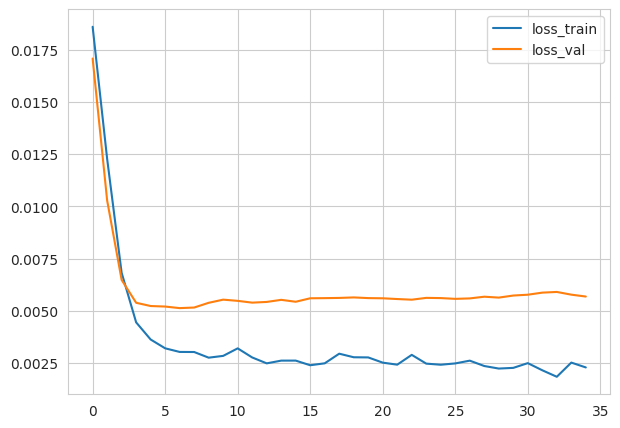

In [267]:
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(loss_train_list)), loss_train_list, label = 'loss_train')
plt.plot(np.arange(len(loss_val_list)), loss_val_list, label = 'loss_val')
plt.legend(loc='upper right')
plt.show()

In [268]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

preds = []
model.eval()
with torch.no_grad():
    for X, y in test_dl:
        X = X.to(device)
        output = model(X)
        preds.append(output.argmax(dim=1).cpu().numpy())
preds = np.concatenate(preds)
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        89
           1       0.95      0.95      0.95       111

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



#### KERAS NN

In [271]:
import pandas as pd
import torch
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch import nn
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, \
log_loss, recall_score, precision_score
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import  Dense, Dropout 
from tensorflow.keras import optimizers
import tensorflow as tf

In [307]:
X_adv = df.drop(columns=['Clicked on Ad', 'Ad Topic Line', 'City', 'Country', 'Timestamp'])
y_adv = df['Clicked on Ad'].to_numpy()
X_adv = X_adv.to_numpy()

X_adv[:5]

array([[6.895000e+01, 3.500000e+01, 6.183390e+04, 2.560900e+02,
        0.000000e+00],
       [8.023000e+01, 3.100000e+01, 6.844185e+04, 1.937700e+02,
        1.000000e+00],
       [6.947000e+01, 2.600000e+01, 5.978594e+04, 2.365000e+02,
        0.000000e+00],
       [7.415000e+01, 2.900000e+01, 5.480618e+04, 2.458900e+02,
        1.000000e+00],
       [6.837000e+01, 3.500000e+01, 7.388999e+04, 2.255800e+02,
        0.000000e+00]])

In [308]:
n_classes=len(set(y_adv))
n_classes

2

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X_adv, y_adv, test_size=0.2, random_state=42)

In [310]:
y_train_bin = keras.utils.to_categorical(y_train, n_classes)
y_test_bin = keras.utils.to_categorical(y_test, n_classes)

In [311]:
y_train_bin[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [312]:
y_train[:3]

array([0, 0, 0])

In [313]:
n_feat=X_train.shape[1]
n_feat

5

In [314]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

X_train.mean(axis=0), X_test.mean(axis=0)


(array([-2.74696932e-15,  1.66880398e-16,  3.57845698e-15,  3.08593429e-15,
         2.43138842e-16]),
 array([-0.05636502, -0.02251825, -0.02273592, -0.17606552,  0.03503549]))

In [315]:
X_train.std(axis=0), X_test.std(axis=0)

(array([1., 1., 1., 1., 1.]),
 array([0.97948124, 0.97402858, 1.01159184, 0.99713533, 1.00096399]))

In [369]:
model = Sequential()
model.add(Dense(64, input_dim=n_feat, activation='softmax'))
model.add(Dropout(0.3))
model.add(Dense(n_classes, activation='softmax'))


batch_size = 32
epochs = 25
model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])
model.fit(X_train, y_train_bin, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test_bin))


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4141 - loss: 0.6964 - val_accuracy: 0.8450 - val_loss: 0.6896
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6791 - loss: 0.6885 - val_accuracy: 0.9200 - val_loss: 0.6821
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8729 - loss: 0.6788 - val_accuracy: 0.8850 - val_loss: 0.6738
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9023 - loss: 0.6677 - val_accuracy: 0.9000 - val_loss: 0.6628
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9124 - loss: 0.6545 - val_accuracy: 0.9050 - val_loss: 0.6497
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9314 - loss: 0.6410 - val_accuracy: 0.9200 - val_loss: 0.6340
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9165 - loss: 0.6232 - val_accuracy: 0.9200 - val_loss: 0.6164
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9353 - loss: 0.6007 - val_accuracy: 0.9200 - val_loss

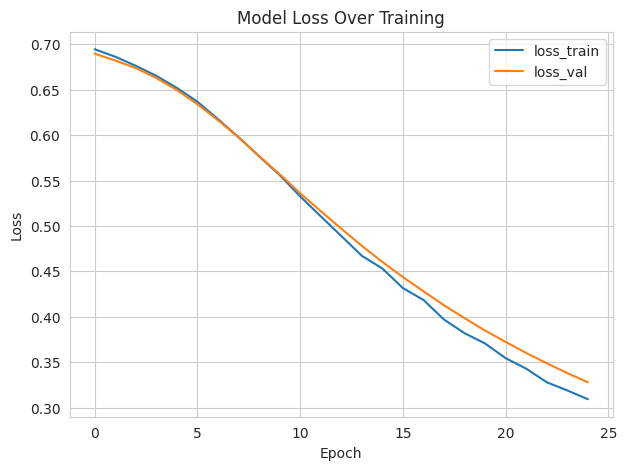

In [370]:
plt.figure(figsize=(7, 5))
plt.plot(np.arange(len(model.history.history['loss'])), model.history.history['loss'], label='loss_train')
plt.plot(np.arange(len(model.history.history['val_loss'])), model.history.history['val_loss'], label='loss_val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss Over Training')
plt.legend(loc='upper right')
plt.show()

In [371]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,544 (6.04 KB)

 Trainable params: 514 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,030 (4.03 KB)

In [372]:
pred_proba = model.predict(X_test)
pred_proba[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.3170528 , 0.68294716],
       [0.20099884, 0.7990012 ],
       [0.22047628, 0.7795238 ],
       [0.23770688, 0.7622931 ],
       [0.78083897, 0.21916105]], dtype=float32)

In [373]:
pred=np.argmax(pred_proba,axis=1)
pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1])

In [374]:
y_test

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

In [375]:
classf_report=classification_report(y_test, pred)
print(classf_report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        89
           1       0.98      0.90      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [376]:
confusion_matrix(y_test, pred)

array([[ 87,   2],
       [ 11, 100]])

#### TINYGRAD

In [2]:
from typing import List, Callable
from tinygrad import Tensor, TinyJit, nn, GlobalCounters
from tinygrad.helpers import getenv, colored, trange
from tinygrad.nn.datasets import mnist

In [4]:
class Model:
  def __init__(self):
    self.layers: List[Callable[[Tensor], Tensor]] = [
      nn.Conv2d(1, 32, 5), Tensor.relu,
      nn.Conv2d(32, 32, 5), Tensor.relu,
      nn.BatchNorm(32), Tensor.max_pool2d,
      nn.Conv2d(32, 64, 3), Tensor.relu,
      nn.Conv2d(64, 64, 3), Tensor.relu,
      nn.BatchNorm(64), Tensor.max_pool2d,
      lambda x: x.flatten(1), nn.Linear(576, 10)]

  def __call__(self, x:Tensor) -> Tensor: return x.sequential(self.layers)


In [6]:
X_train, Y_train, X_test, Y_test = mnist(fashion=getenv("FASHION"))


In [8]:
model = Model()
opt = nn.optim.Adam(nn.state.get_parameters(model))

In [ ]:
@TinyJit
@Tensor.train()
def train_step() -> Tensor:
    opt.zero_grad()
    samples = Tensor.randint(getenv("BS", 512), high=X_train.shape[0])
    loss = model(X_train[samples]).sparse_categorical_crossentropy(Y_train[samples]).backward()
    opt.step()
    return loss

In [13]:
@TinyJit
@Tensor.test()
def get_test_acc() -> Tensor: 
    return (model(X_test).argmax(axis=1) == Y_test).mean()*100

In [16]:

for i in (t:=trange(getenv("STEPS", 70))):
    GlobalCounters.reset()  
    loss = train_step()
    if i%10 == 9: 
        test_acc = get_test_acc().item()
        t.set_description(f"loss: {loss.item():6.2f} test_accuracy: {test_acc:5.2f}%")

if target := getenv("TARGET_EVAL_ACC_PCT", 0.0):
    if test_acc >= target and test_acc != 100.0: 
        print(colored(f"{test_acc=} >= {target}", "green"))
    else: 
        raise ValueError(colored(f"{test_acc=} < {target}", "red"))

loss:   0.22 test_accuracy: 94.47%: 100%|███████| 70/70 [13:25<00:00,  0.09it/s]


In [17]:
# tests prediction
if getenv("TEST_PREDICTION", 0) == 1:
    pred = model(X_test[:10]).argmax(axis=1).numpy()
    print(f"pred: {pred}")
    print(f"expected: {Y_test[:10].numpy()}")
    assert np.array_equal(pred, Y_test[:10].numpy()), "Predictions do not match expected values"